<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Comapre-Logistic-regression-and-K-Nearest-Neighbors-was-used-to-classify-people-who-drank-alcohol-or-not" data-toc-modified-id="Comapre-Logistic-regression-and-K-Nearest-Neighbors-was-used-to-classify-people-who-drank-alcohol-or-not-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Comapre Logistic regression and K-Nearest Neighbors was used to classify people who drank alcohol or not</a></span><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Data-analysis" data-toc-modified-id="Data-analysis-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Data analysis</a></span><ul class="toc-item"><li><span><a href="#Dataset-input" data-toc-modified-id="Dataset-input-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Dataset input</a></span></li><li><span><a href="#EDA-for-dataset" data-toc-modified-id="EDA-for-dataset-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>EDA for dataset</a></span></li><li><span><a href="#map-categorical-variables-to-numerical-variables" data-toc-modified-id="map-categorical-variables-to-numerical-variables-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>map categorical variables to numerical variables</a></span></li></ul></li><li><span><a href="#logistic-regression-model" data-toc-modified-id="logistic-regression-model-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>logistic regression model</a></span><ul class="toc-item"><li><span><a href="#Split-the-dataset" data-toc-modified-id="Split-the-dataset-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Split the dataset</a></span></li><li><span><a href="#Use-logistic-model" data-toc-modified-id="Use-logistic-model-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Use logistic model</a></span></li></ul></li><li><span><a href="#KNN-Model" data-toc-modified-id="KNN-Model-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>KNN Model</a></span><ul class="toc-item"><li><span><a href="#Split-the-dataset" data-toc-modified-id="Split-the-dataset-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Split the dataset</a></span></li><li><span><a href="#Use-KNN-Model" data-toc-modified-id="Use-KNN-Model-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Use KNN Model</a></span></li></ul></li><li><span><a href="#Measure-Model-Accuracy" data-toc-modified-id="Measure-Model-Accuracy-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Measure Model Accuracy</a></span><ul class="toc-item"><li><span><a href="#For-Logistic-regression-model" data-toc-modified-id="For-Logistic-regression-model-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>For Logistic regression model</a></span></li><li><span><a href="#For-KNN-Model" data-toc-modified-id="For-KNN-Model-1.5.2"><span class="toc-item-num">1.5.2&nbsp;&nbsp;</span>For KNN Model</a></span></li><li><span><a href="#Compare-and-discuss" data-toc-modified-id="Compare-and-discuss-1.5.3"><span class="toc-item-num">1.5.3&nbsp;&nbsp;</span>Compare and discuss</a></span></li></ul></li><li><span><a href="#Improve-model-accuracy" data-toc-modified-id="Improve-model-accuracy-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Improve model accuracy</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li></ul></div>

# Comapre Logistic regression and K-Nearest Neighbors was used to classify people who drank alcohol or not

## Introduction

In this project, we explore two popular machine learning algorithms, Logistic Regression and K-Nearest Neighbors (KNN), to predict whether individuals drink or not based on a diverse set of features. The dataset includes a wide range of health and demographic parameters such as sex, age, height, weight, cholesterol levels, and various medical indicators. By leveraging Logistic Regression and KNN, we aim to build predictive models that discern individuals' drinking habits based on these characteristics. Through Exploratory Data Analysis (EDA), model fitting, and accuracy evaluation using the Performance Metrics, we aim to assess the performance and effectiveness of both algorithms in this binary classification task.


## Data analysis

###  Dataset input

In [2]:
# import package 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# data libraries
import numpy as np 
!pip install missingno
!pip install termcolor
# visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

# ml libraries


# warnings
from termcolor import colored
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 300)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

Dataset have 23 labels and data source from [Kaggle](https://www.kaggle.com/datasets/sooyoungher/smoking-drinking-dataset/data) and can see include 240000 rows.

In [3]:
import os
logfile=os.path.join('..', 'data', 'raw', 'smoking_driking_dataset.csv')
dataset = pd.read_csv(logfile, sep=",")


In [4]:
dataset.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,BLDS,tot_chole,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.000,1.000,1.000,1,1,120,80,99,193,48,126,92,17.100,1,1.000,21,35,40,1,Y
1,Male,30,180,80,89.000,0.900,1.200,1,1,130,82,106,228,55,148,121,15.800,1,0.900,20,36,27,3,N
2,Male,40,165,75,91.000,1.200,1.500,1,1,120,70,98,136,41,74,104,15.800,1,0.900,47,32,68,1,N
3,Male,50,175,80,91.000,1.500,1.200,1,1,145,87,95,201,76,104,106,17.600,1,1.100,29,34,18,1,N
4,Male,50,165,60,80.000,1.000,1.200,1,1,138,82,101,199,61,117,104,13.800,1,0.800,19,12,25,1,N


Determine dataset each column meaning: 

Sex ：   male, female  
age ：            round up to 5 years  
height ：        round up to 5 cm[cm]  
weight ：       [kg]  
sight_left ：      eyesight(left)  
sight_right ：     eyesight(right)  
hear_left ：      hearing left, 1(normal), 2(abnormal)  
hear_right ：      hearing right, 1(normal), 2(abnormal)  
SBP ：     Systolic blood pressure[mmHg]  
DBP ：          Diastolic blood pressure[mmHg]  
BLDS ：          BLDS or FSG(fasting blood glucose)[mg/dL]  
tot_chole ：      total cholesterol[mg/dL]  
HDL_chole ：      HDL cholesterol[mg/dL]	HDL  
LDL_chole ：      LDL cholesterol[mg/dL]	LDL  
triglyceride ：     triglyceride[mg/dL]  
hemoglobin ：       hemoglobin[g/dL]  
urine_protein：     protein in urine, 1(-), 2(+/-), 3(+1), 4(+2), 5(+3), 6(+4)  
serum_creatinine ：   serum(blood) creatinine[mg/dL]  
SGOT_AST ：       SGOT(Glutamate-oxaloacetate transaminase) AST(Aspartate transaminase)[IU/L]T  
SGOT_ALT ：       ALT(Alanine transaminase)[IU/L]  
gamma_GTP ：       y-glutamyl transpeptidase[IU/L]  
SMK_stat_type_cd ：    Smoking state, 1(never), 2(used to smoke but quit), 3(still smoke)  
DRK_YN ：          Drinker or Not

### EDA for dataset

Use EDA to analysis data first.

In [5]:
dataset.shape

(240000, 24)

In [6]:
# Summary statistics of numerical columns
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
age,240000.000,47.648,14.181,20.000,35.000,45.000,60.000,85.000
height,240000.000,162.262,9.283,130.000,155.000,160.000,170.000,190.000
weight,240000.000,63.318,12.541,25.000,55.000,60.000,70.000,140.000
waistline,240000.000,81.288,12.190,27.000,74.200,81.000,88.000,999.000
sight_left,240000.000,0.982,0.609,0.100,0.700,1.000,1.200,9.900
sight_right,240000.000,0.980,0.610,0.100,0.700,1.000,1.200,9.900
hear_left,240000.000,1.031,0.174,1.000,1.000,1.000,1.000,2.000
hear_right,240000.000,1.030,0.171,1.000,1.000,1.000,1.000,2.000
SBP,240000.000,122.434,14.522,72.000,112.000,120.000,131.000,241.000
DBP,240000.000,76.058,9.886,36.000,70.000,76.000,82.000,185.000


In [7]:
# including data types and null values
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               240000 non-null  object 
 1   age               240000 non-null  int64  
 2   height            240000 non-null  int64  
 3   weight            240000 non-null  int64  
 4   waistline         240000 non-null  float64
 5   sight_left        240000 non-null  float64
 6   sight_right       240000 non-null  float64
 7   hear_left         240000 non-null  int64  
 8   hear_right        240000 non-null  int64  
 9   SBP               240000 non-null  int64  
 10  DBP               240000 non-null  int64  
 11  BLDS              240000 non-null  int64  
 12  tot_chole         240000 non-null  int64  
 13  HDL_chole         240000 non-null  int64  
 14  LDL_chole         240000 non-null  int64  
 15  triglyceride      240000 non-null  int64  
 16  hemoglobin        24

According to data columns (labels), we can see that these data represent human health information, such as height and weight, blood pressure, blood protein content, etc., including 21 columns of numerical values and 2 columns of object values. The dataset includes three categorical labels, including gender, smoking, and drinking.

In [8]:
# Check dataset for data type, size, and missing values

dataset.shape
print("----- Shape -----")
print(dataset.shape)
print("\n----- Types -----")
print(dataset.dtypes)
print("\n----- Missing values (NA) -----")
print(dataset.isnull().sum())
print("\n----- Quantiles -----")
display(dataset.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]))


----- Shape -----
(240000, 24)

----- Types -----
sex                  object
age                   int64
height                int64
weight                int64
waistline           float64
sight_left          float64
sight_right         float64
hear_left             int64
hear_right            int64
SBP                   int64
DBP                   int64
BLDS                  int64
tot_chole             int64
HDL_chole             int64
LDL_chole             int64
triglyceride          int64
hemoglobin          float64
urine_protein         int64
serum_creatinine    float64
SGOT_AST              int64
SGOT_ALT              int64
gamma_GTP             int64
SMK_stat_type_cd      int64
DRK_YN               object
dtype: object

----- Missing values (NA) -----
sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP        

,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,BLDS,tot_chole,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd
0.000,20.000,130.000,25.000,27.000,0.100,0.100,1.000,1.000,72.000,36.000,38.000,54.000,1.000,1.000,1.000,1.000,1.000,0.100,1.000,1.000,1.000,1.000
0.050,25.000,150.000,45.000,66.000,0.400,0.400,1.000,1.000,100.000,60.000,79.000,137.000,36.000,60.000,46.000,11.700,1.000,0.600,15.000,10.000,10.000,1.000
0.500,45.000,160.000,60.000,81.000,1.000,1.000,1.000,1.000,120.000,76.000,96.000,193.000,55.000,111.000,106.000,14.300,1.000,0.800,23.000,20.000,23.000,1.000
0.950,70.000,175.000,85.000,97.000,1.500,1.500,1.000,1.000,148.000,92.000,137.000,261.000,84.000,173.000,299.000,16.600,2.000,1.200,46.000,59.000,106.000,3.000
0.990,80.000,180.000,95.000,105.000,2.000,2.000,2.000,2.000,161.000,101.000,205.000,296.000,99.000,204.000,501.000,17.500,3.000,1.400,80.000,107.000,230.000,3.000
1.000,85.000,190.000,140.000,999.000,9.900,9.900,2.000,2.000,241.000,185.000,769.000,1619.000,8110.000,5119.000,9490.000,24.200,6.000,94.000,1911.000,2309.000,999.000,3.000


We can see dataset not include null value. The data set is complete.

In [9]:
dataset.quantile() 

age                 45.000
height             160.000
weight              60.000
waistline           81.000
sight_left           1.000
sight_right          1.000
hear_left            1.000
hear_right           1.000
SBP                120.000
DBP                 76.000
BLDS                96.000
tot_chole          193.000
HDL_chole           55.000
LDL_chole          111.000
triglyceride       106.000
hemoglobin          14.300
urine_protein        1.000
serum_creatinine     0.800
SGOT_AST            23.000
SGOT_ALT            20.000
gamma_GTP           23.000
SMK_stat_type_cd     1.000
Name: 0.5, dtype: float64

In [10]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
   
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car


cat_cols, num_cols, cat_but_car = grab_col_names(dataset)
print(f"\n{colored('Numerical Columns:','blue', attrs=['reverse'])} {num_cols}\n\n\n{colored('Categorical Columns:','magenta', attrs=['reverse'])} {cat_cols}\n\n\n"
        f"{colored('Cardinal Columns:','cyan', attrs=['reverse'])}{cat_but_car}\n")

Observations: 240000
Variables: 24
cat_cols: 6
num_cols: 18
cat_but_car: 0
num_but_cat: 4

Numerical Columns: ['age', 'height', 'weight', 'waistline', 'sight_left', 'sight_right', 'SBP', 'DBP', 'BLDS', 'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin', 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT', 'gamma_GTP']


Categorical Columns: ['sex', 'DRK_YN', 'hear_left', 'hear_right', 'urine_protein', 'SMK_stat_type_cd']


Cardinal Columns:[]



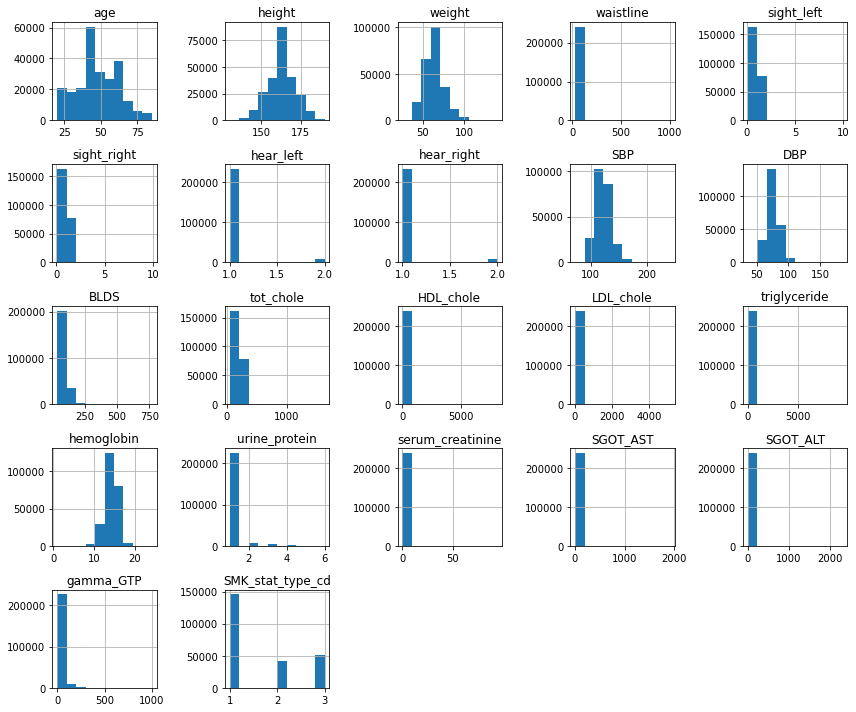

In [11]:
# Visualization for numerical values
dataset.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

According to the histogram for each numerical labels, we can intuitively see the distribution of data. For example, the age distribution is between 20 and 80 years old, with 40-45 years old being the most. The height of people up to about 160 cm is the most, and the weight is generally distributed between 50kg and 80kg.For hemoglobin content, blood pressure, blood pressure and other medical data, you can see that the basic distribution is in a specific interval.

After that,visualization for categorical values separately.

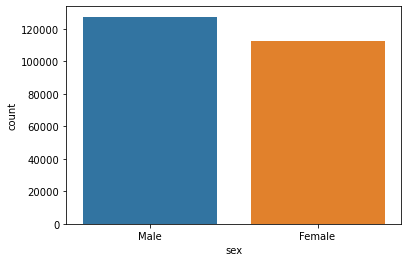

In [12]:
# Countplot for categorical features
sns.countplot(x='sex', data=dataset)
plt.show()

In [14]:
dataset['sex'].value_counts()

Male      127566
Female    112434
Name: sex, dtype: int64

From the gender statistics chart, there are a little more male than female.

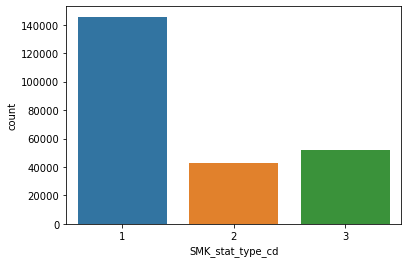

In [13]:
# Countplot for categorical features
sns.countplot(x='SMK_stat_type_cd', data=dataset)
plt.show()

In [15]:
dataset['SMK_stat_type_cd'].value_counts()

1    145649
3     51821
2     42530
Name: SMK_stat_type_cd, dtype: int64

Looking for Smoking state[ 1(never), 2(used to smoke but quit), 3(still smoke)],we can see non-smokers accounted for the majority, and regular smokers were slightly more numerous than occasional smokers

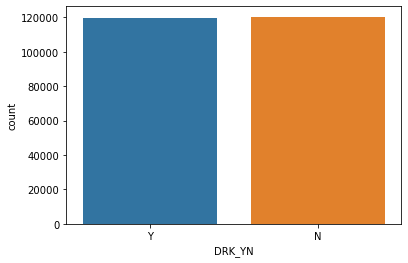

In [16]:
# Countplot for categorical features
sns.countplot(x='DRK_YN', data=dataset)
plt.show()

In [17]:
dataset['DRK_YN'].value_counts()

N    120340
Y    119660
Name: DRK_YN, dtype: int64

As follow drinking state plot, those who drink and those who don't drink are pretty much the same.

In [18]:
# analysis of categorical variables
def cat_summary(dataframe, col_name, plot=False):
    display(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))

    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show()


for col in cat_cols:
    cat_summary(dataset, col)
    print("")

,sex,Ratio
Male,127566,53.153
Female,112434,46.847


,DRK_YN,Ratio
N,120340,50.142
Y,119660,49.858


,hear_left,Ratio
1,232502,96.876
2,7498,3.124


,hear_right,Ratio
1,232752,96.980
2,7248,3.020


,urine_protein,Ratio
1,226299,94.291
2,7534,3.139
3,4045,1.685
4,1539,0.641
5,465,0.194
6,118,0.049


,SMK_stat_type_cd,Ratio
1,145649,60.687
3,51821,21.592
2,42530,17.721


### map categorical variables to numerical variables

Then we want to observe the correlation between the labels through heatmap especially observe these labels have a strong or weak correlation with whether they drink alcohol column. First of all need to map categorical variables to numerical variables.

I first creat the dictionary for mapping, converted the object variable of yes and no into number 0 and 1, and then used the `replace` function to replace the original data with the transformed data. In this way we have a data set with the same data format.

In [19]:
# Create a dictionary for mapping
drink_mapping = {'Y': 1, 'N': 0}

# Use replace() method to apply the mapping
dataset['DRK_YN'] = dataset['DRK_YN'].replace(drink_mapping)

In [20]:
# Create a dictionary for_mapping 
sex_mapping = {'Male': 1.0, 'Female': 0.0}
# Use replace() method to apply the mapping
dataset['sex'] = dataset['sex'].replace(sex_mapping)

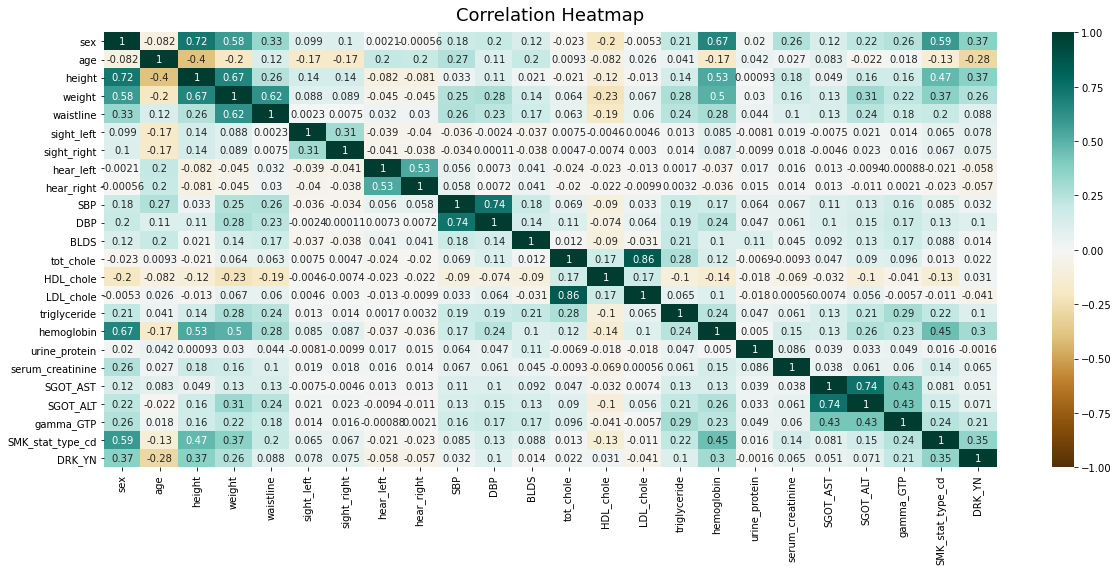

In [21]:
plt.figure(figsize=(20, 8))
heatmap = sns.heatmap(dataset.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
# save heatmap as .png file
# dpi - sets the resolution of the saved image in dots/inches
# bbox_inches - when set to 'tight' - does not allow the labels to be cropped
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

Read it: the larger the number and darker the color the higher the correlation between the two variables. So follow the heatmap, we can see SDP & DBP, tot_chole & LDL_chole has higher relation.

It can be observed that sex and height has both the strongest correlation with drink type(0.37) compare to other labels, while smoke state also have a strong correlation with drinking type(0.35).

##  logistic regression model 

Then, fit logistic regression model to predict and first step for Split the dataset.

### Split the dataset 

In [22]:
# Separate features and target variable
features = dataset[['sex', 'age', 'height', 'weight', 'waistline', 'sight_left', 'sight_right', 
                 'hear_left', 'hear_right', 'SBP', 'LDL_chole', 'triglyceride', 'hemoglobin', 
                 'urine_protein', 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT', 'gamma_GTP', 
                 'SMK_stat_type_cd']]
target = dataset['DRK_YN']


In [23]:
# Split the dataset into training and testing sets (80% training, 20% testing)
X_train_l, X_test_l, y_train_l, Y_test = train_test_split(features, target, test_size=0.2, random_state=42)

### Use logistic model

Then, fit logistic regression model to predict and first step for Split the dataset.

In [24]:
# Initialize the logistic regression model
model = LogisticRegression()

In [25]:
# Train the model using the training data
model.fit(X_train_l, y_train_l)

LogisticRegression()

In [26]:
# Make predictions on the test data
predictions = model.predict(X_test_l)

In [ ]:
# Create a comparison DataFrame
comparison_df = pd.DataFrame({'Actual': Y_test, 'Predicted': predictions})
comparison_df.head()

Comparing the predicted numbers with the real numbers, we can see that the results are not exactly the same.

<Figure size 720x432 with 0 Axes>

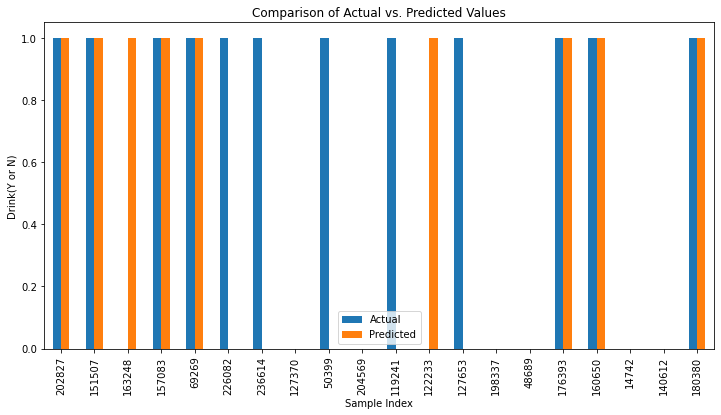

In [28]:
# Plot a bar chart to compare actual vs. predicted values
plt.figure(figsize=(10, 6))
comparison_df[:20].plot(kind='bar', figsize=(12, 6))
plt.xlabel('Sample Index')
plt.ylabel('Drink(Y or N)')
plt.title('Comparison of Actual vs. Predicted Values')
plt.show()

Then plot a bar chart to compare actual and predicted values,it can be seen that at most 70 percent of the results are consistent.

## KNN Model

### Split the dataset 

In [29]:
X = dataset.drop(["DRK_YN"], axis=1)

y = dataset["DRK_YN"]

In [30]:
# splitting into training and test datasets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

In [31]:
# shape of X_train and X_test

X_train.shape, X_test.shape

((216000, 23), (24000, 23))

In [32]:
# datatypes of X_train

X_train.dtypes

sex                 float64
age                   int64
height                int64
weight                int64
waistline           float64
sight_left          float64
sight_right         float64
hear_left             int64
hear_right            int64
SBP                   int64
DBP                   int64
BLDS                  int64
tot_chole             int64
HDL_chole             int64
LDL_chole             int64
triglyceride          int64
hemoglobin          float64
urine_protein         int64
serum_creatinine    float64
SGOT_AST              int64
SGOT_ALT              int64
gamma_GTP             int64
SMK_stat_type_cd      int64
dtype: object

In [33]:
# check for missing values (training dataset)
print("-----Missing Values-----")
X_train.isnull().sum()

-----Missing Values-----


sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           0
SMK_stat_type_cd    0
dtype: int64

In [34]:
# check for missing values (testing dataset)
print("-----Missing Values-----")
X_test.isnull().sum()

-----Missing Values-----


sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           0
SMK_stat_type_cd    0
dtype: int64

In [35]:
# percentage of missing values

for col in X_train.columns:
    if X_train[col].isnull().mean()>0:
        print(col, round(X_train[col].isnull().mean(),4))

In [36]:
X_train.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,BLDS,tot_chole,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd
27421,0.000,25,155,60,69.000,0.600,0.900,1,1,110,70,91,152,62,78,62,14.400,1,0.900,18,17,18,1
116139,1.000,60,160,55,79.000,1.200,0.900,1,1,130,85,113,204,43,138,112,14.000,1,1.000,30,24,24,2
113151,1.000,30,180,85,65.000,1.500,0.900,1,1,130,80,142,219,52,111,280,15.600,1,1.000,25,28,92,1
11045,1.000,45,180,85,91.000,1.200,1.200,1,1,140,84,97,185,34,118,162,17.100,1,1.100,26,39,43,3
112708,1.000,40,170,70,84.900,1.200,1.500,1,1,135,83,92,244,48,159,183,14.000,1,0.900,21,21,126,2


In [37]:
X_test.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,BLDS,tot_chole,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd
45155,1.000,30,170,75,87.000,0.900,1.000,1,1,111,78,100,240,68,149,115,16.600,1,1.100,28,70,33,1
238446,0.000,70,150,70,97.000,0.500,0.700,1,1,118,64,93,232,42,149,204,14.400,1,0.700,28,24,27,1
121013,0.000,75,145,50,84.000,0.400,0.300,1,1,142,82,121,202,46,89,331,14.900,1,0.900,28,33,37,1
176784,1.000,60,160,65,80.600,0.700,0.600,1,1,130,80,94,236,35,131,347,15.300,1,0.900,17,14,33,3
31780,1.000,60,170,75,90.000,9.900,0.800,1,1,143,82,127,177,29,126,111,14.900,1,0.900,19,15,39,3


In [38]:
cols = X_train.columns

### Use KNN Model

k-NN is a simple, supervised, non-parametric, non-linear model that finds the k-nearest unseen data points surrounding and assigns the class (in this case, drinker or non-drinker) based on classes of k-neighborhoods having the most number of data points. We use the Minkowski distance metric.

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [40]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
knn = KNeighborsClassifier(n_neighbors=3)
basemodel = knn.fit(X_train, y_train)

In [48]:
y_pred = knn.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

## Measure Model Accuracy

Performance Metrics was used to measure the accuracy of the model include `accuracy_score` and `recall_score`, `precision_score`  and `f1_score`

Performance metrics are crucial for measuring the accuracy of machine learning models, as they provide quantifiable and interpretable measures of the model's performance on a particular task. It can allow different models or algorithms to be compared and aid in decision-making processes.

The mathematical definition of using these functions and source from [Students’ Performance Analyses Using Machine
Learning Algorithms in WEKA](https://iopscience.iop.org/article/10.1088/1757-899X/1031/1/012061?gclid=CjwKCAiA3aeqBhBzEiwAxFiOBlU7XH4Jq2mTb-WR-ikgeyw67oZU0SyJnmEHnyd4-h5vwFl-B5mGDRoCGcIQAvD_BwE)

For Accuracy:  
    Accuracy is the number of all correct classifications divided by the total numbers of cases :Accuracy= (TP+TN)/(TP+TN+FP+FN)

Recall:  
    also know as Rate of true positives : TP Rate = TP/TP+FN

Precision:  
    Precision is the number of correct positive classifications divided by the total number of positive
classifications :P= TP/(TP+FP)

F-measure:  
    F-measure is a harmonic mean of precision (𝑃) and recall (𝑅).:Fm= 2PR/(P+R)

true positive (TP) i.e. correct positive prediction,  
true negative (TN) i.e. correct negative prediction,  
false positive (FP) i.e. incorrect positive prediction  
false negative (FN) i.e. incorrect negative prediction

### For Logistic regression model

In [42]:
## Import the library and functions you need
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
## Accuracy
accuracy = accuracy_score(Y_test,predictions)
print(f'Accuracy: {accuracy * 100:.2f}%')
## Precision
precision = precision_score(Y_test,predictions)
print(f'precision: { precision * 100:.2f}%')
## Recall
recall = recall_score(Y_test,predictions,average='binary')
print('Recall: %.3f' % recall)
## F1 Score
F_1 = f1_score(Y_test,predictions,average='binary')
print('F1 score: %f' % F_1)

Accuracy: 71.46%
precision: 72.02%
Recall: 0.697
F1 score: 0.708283


### For KNN Model

In [49]:
print(f"Accuracy: {round(accuracy_score(y_pred, y_test), 4)}")
print(f"Recall: {round(recall_score(y_pred, y_test), 4)}")
print(f"Precision: {round(precision_score(y_pred, y_test), 4)}")
print(f"F1: {round(f1_score(y_pred, y_test), 4)}")

Accuracy: 0.6706
Recall: 0.6645
Precision: 0.6795
F1: 0.6719


### Compare and discuss

From the results of Performance metrics, it can be concluded that the prediction results of logistic regression model are better, and the values of `accuracy_score`, `recall_score`, `precision_score` and `f1_score` of logistic regression are higher.  

 This is further analyzed:

(1) Why is the logistic regression model more accurate than KNN ?

First, consider variables on datasat relationship is linear or non-linear. Logistic regression is a linear classifier, which means that it assumes a linear relationship between features and target variables. It can perform well if the relationship in the data is indeed linear. KNN, on the other hand, is a nonlinear algorithm that can capture complex, nonlinear relationships in the data. If the true relationship is nonlinear, KNN may be superior to logistic regression.

Second, the size of the prediction data can be considered. KNN is sensitive to the size of the data because it needs to calculate the distance between the data points. For large data sets, the calculation accuracy of KNN may not be as good as logistic regression.

Third, it is possible to consider the feature correlation. KNN may be more sensitive than logistic regression when one wishes to understand the impact of each characteristic on the forecast. It would treat all features equally, including irrelevant or noisy features. So correct feature selection and preprocessing are the key to KNN.

(2) Discuss the advantages and disadvantages of the two models.

For logistic regression, it will be more efficient when dealing with large data sets and is well suited to binary classification problems, especially where the output variable has two classes. But the disadvantage is that it is easy to underfit when the data relationship is nonlinear. In contrast to classification models such as decision trees, it is not very effective in capturing complex relationships in the data.  

For KNN, it can effectively capture complex patterns in data and adapt well to changes in data sets. For nonlinear data relationships, it is more effective than logistic regression. However, the computational cost may be high, especially for large data sets, because it needs to calculate the distance between query points and all training points. And has high sensitivity to irrelevant feature values, which is prone to interference.

## Improve model accuracy

Use  Cross-validation (CV)  to find the best one for KNN

In [ ]:
k_values = [i for i in range (1,8)]
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(X)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))

In [ ]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [ ]:
best_index = np.argmax(scores)
best_k = k_values[best_index]

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

In [ ]:
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

In [ ]:
plt.figure(figsize=(6,4))

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

Use L1 regularization to improve logistic regression, more detail can find [sklearn.linear_model.LogisticRegression](https://scikit-learn.org/0.16/modules/generated/sklearn.linear_model.LogisticRegression.html)

After doing some research (reading books on machine learning and online tutorial), I found that L1 regularization is helpful to improve the accuracy of logistic regression model. Please refer to my reflection for the specific theoretical part.

But it runs very slowly and can take several minutes. I mentioned results for accuracy increase from 71.46% to 71.76% and recall score increase from 0.697 to 0.703. From the results, the accuracy of the model has been improved.

In [43]:
from sklearn.linear_model import LogisticRegression

# Create a logistic regression model with L1 regularization (Lasso)
model_l1 = LogisticRegression(penalty='l1', solver='liblinear', C=1.0) # C is the inverse of regularization strength

In [44]:
# Train the model
model_l1.fit(X_train_l, y_train_l)

LogisticRegression(penalty='l1', solver='liblinear')

In [45]:
# Make predictions
predictions_l1 = model_l1.predict(X_test_l)

In [46]:
# Evaluate the model (calculate accuracy, etc.)
accuracy_l1 = model_l1.score(X_test_l, Y_test)
accuracy_l1

0.7175208333333334

In [47]:
from sklearn.metrics import recall_score
recall = recall_score(Y_test, predictions_l1, average='binary')
print('Recall: %.3f' % recall)

Recall: 0.703


## Conclusion

Overall, we fit and contrast different models in categorically predicting whether a person drinks according to body signals data for logistic regression model and KNN model.

The performance metrics do much better for logistic regression in each case. In terms of finding true positives, we can see that logistic regression certainly performs better. This means that someone who drinks correctly predicts 69.7% of the positive observations, while the k-NN model correctly predicts 67.16% of the positive observations.